# **MALARIA DETECTION** 

# Table of Contents:
**1** - Introduction

**2** - Import Libraries

**3** - Read and Overview Data

**4** - Load Data

**5** - Data Preparation

**6** - Building Deep Learning model - Artificial Neural Network

**7** - Training Accuracy & Loss Curve

**8** - Validation Accuracy & Loss Curve

**9** - Model Testing

**10** - Confusion Matrix

**11** - ROC Curve

**12** - Conclusion

### 1 - INTRODUCTION

The deep learning have open the new era to increase the computational power of processing the dataset. Also it has paved way to process unstructured data such as image, audio and video data which normal machine learning models takes longer hours to train. With the help of neural networks and back propogation we can minimize the loss in our prediction and be more accurate.

**Absrtact**

Malaria is a blood disease caused by the Plasmodium parasites transmitted through the bite of female Anopheles mosquito. Microscopists commonly examine thick and thin blood smears to diagnose disease and compute parasitemia. However, their accuracy depends on smear quality and expertise in classifying and counting parasitized and uninfected cells. Such an examination could be arduous for large-scale diagnoses resulting in poor quality. State-of-the-art image-analysis based computer-aided diagnosis (CADx) methods using machine learning (ML) techniques, applied to microscopic images of the smears using hand-engineered features demand expertise in analyzing morphological, textural, and positional variations of the region of interest (ROI).

**Problem statement**

Artificiall Neural Networks (ANN), a class of deep learning (DL) models promise highly scalable and superior results with end-to-end feature extraction and classification. Automated malaria screening using DL techniques could, therefore, serve as an effective diagnostic aid. In this study, we evaluate the performance of pre-trained ANN based DL models as feature extractors toward classifying parasitized and uninfected cells to aid in improved disease screening.


### 2 - IMPORT LIBRARIES

In [1]:
import sklearn
import PIL
from matplotlib import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage import transform, color
from PIL import Image 
import numpy as np
from os import listdir
from os.path import isfile, join
import os
import cv2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

import pandas as pd
import matplotlib.pyplot as plt
import chart_studio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

### 3 - READ AND OVERVIEW DATA 

*Showing one Parasitized Malaria Cell and one Uninfected malaria cell to see how it looks*

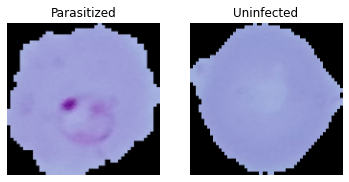

In [2]:
# for image read i used opencv to resize and east read png files 
data1 = cv2.imread("C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png") #parasitized malaria cell path and call one image
data1 = cv2.resize(data1,(160,160)) 
plt.subplot(1,2,1)
plt.imshow(data1)
plt.axis("off")
plt.title("Parasitized")
data1 = cv2.imread("C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png") #uninfected malaria cell path and call one image
data1 = cv2.resize(data1,(160,160))
plt.subplot(1,2,2)
plt.imshow(data1)
plt.axis("off")
plt.title("Uninfected")
plt.show()

### 4 - LOAD DATA

All data is read and resized per image to 40px,40px for lower processing power. x and y datas are created. Images will be in x data and y data for this data parasitized or not. If y data value equal to 1 this data it means parasitized.

In [3]:
x = list() #create x data
Y = list() # create y data
for i in os.listdir("C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Parasitized/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(40,40)) # resize image for lower processing power
        x.append(img) # append image to x data
        Y.append(1) 
for i in os.listdir("C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Uninfected/"):
    if ".png" in i:
        path = "C:/Users/Lenovo/Desktop/Selected Project X/cell_images/Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        Y.append(0)
x = np.array(x)  

**Show 4 data randomly and their status**

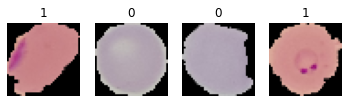

In [4]:
plt.subplot(1,4,1)
plt.imshow(x[2000]) # image 1
plt.title(Y[2000])
plt.axis("off")
plt.subplot(1,4,2) # image 2
plt.imshow(x[22000])
plt.title(Y[22000])
plt.axis("off")
plt.subplot(1,4,3) #image 3
plt.imshow(x[20000])
plt.title(Y[20000])
plt.axis("off")
plt.subplot(1,4,4) #image 4 
plt.imshow(x[200])
plt.title(Y[200])
plt.axis("off")
plt.show()

### 5 - DATA PREPARATION

Reshape data to make it one dimensional before split into the train and test.

In [5]:
#reshapeing data
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
x = x**8

*Test split*

In [6]:
# used sklearn modul for splitting process
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,train_size = 0.8, random_state = 0)

*Validation and train split*

In [7]:
x_train,x_val,Y_train,Y_val = train_test_split(x_train, Y_train, test_size = 0.2, random_state = 42)

*Convert the fields into a numpy array*

In [8]:
x_val = np.array(x_val)
Y_val = np.array(Y_val)

### 6 - BUILDING DEEP LEARNING MODEL - ARTIFICIAL NEURAL NETWORK (ANN)

Artificial Neural network resembles the brain's neural network with densely connected neurons in between input and output layers. It has a hidden layers where the internal processing happens in ANN. The neural network's objective is to minimise the loss(actual-predicted) by using the learning method called as back propogation where the weights get re-initialized in each connecting layer for many epochs through which the loss is minimised.

In this stage we follow 3 steps

1 - Defining the model

2 - Compile the model with loss function

3 - Fitting the model to our data

In [55]:
def build_classifier():
    classifier = Sequential() # initialize neural network from Sequential class
    classifier.add(Dense(units = 64, activation = 'relu', input_dim = x_train.shape[1])) # First hidden layer with 64 neurons
    classifier.add(Dense(units = 64, activation = 'relu')) # Second hidden layer with 64 neurons
    classifier.add(Dense(units = 32, activation = 'relu')) # Third hidden layer with 32 neurons
    classifier.add(Dense(units = 32, activation = 'relu')) # Fourth hidden layer with 32 neurons
    classifier.add(Dense(units = 1, activation = 'sigmoid')) # last layer (The output layer)
    classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Adams's Optimizer is the best one as it is very fast
    # we used binary crossentropy because we have only 2 classes
    return classifier # return our model

*This model have 4 hidden layers, two of them have 64 units and the other two have 32*

In [69]:
model = build_classifier()

In [57]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 250)
history = classifier.fit(x_train, Y_train, batch_size = 30, validation_data=(x_val, Y_val))

Epoch 1/250
588/588 [==============================] - 5s 9ms/step - loss: 0.6292 - accuracy: 0.6405 - val_loss: 0.6013 - val_accuracy: 0.6771
Epoch 2/250
588/588 [==============================] - 3s 5ms/step - loss: 0.5915 - accuracy: 0.6754 - val_loss: 0.5736 - val_accuracy: 0.6966
Epoch 3/250
588/588 [==============================] - 4s 7ms/step - loss: 0.5682 - accuracy: 0.6962 - val_loss: 0.5728 - val_accuracy: 0.6971
Epoch 4/250
588/588 [==============================] - 5s 9ms/step - loss: 0.5523 - accuracy: 0.7048 - val_loss: 0.5700 - val_accuracy: 0.6909
Epoch 5/250
588/588 [==============================] - 6s 10ms/step - loss: 0.5352 - accuracy: 0.7187 - val_loss: 0.5492 - val_accuracy: 0.7116
Epoch 6/250
588/588 [==============================] - 5s 8ms/step - loss: 0.5243 - accuracy: 0.7279 - val_loss: 0.5702 - val_accuracy: 0.7109
Epoch 7/250
588/588 [==============================] - 5s 9ms/step - loss: 0.5123 - accuracy: 0.7346 - val_loss: 0.5454 - val_accuracy: 0.716

### 7 - TRAINING ACCURACY & LOSS CURVE

Plotting Accuracy and loss values per epochs

In [58]:
x_ = np.array(range(len(history.history['loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data, layout = layout)
iplot(fig)

### 8 - VALIDATION ACCURACY & LOSS CURVE

In [59]:
x_ = np.array(range(len(history.history['val_loss'])))# get validation loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['val_loss'], # get validation loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,0,0.9)"),
        text = "Validation Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['val_accuracy'],# get validation accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(255,0,0,0.9)"),
        text = "Validation Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Validation Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

### 8 - MODEL TESTING

In [60]:
classifier.predict(x_test)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [61]:
classifier.score(x_test, Y_test, batch_size = 30)

184/184 [==============================] - 1s 4ms/step - loss: 2.5799 - accuracy: 0.7007


0.7006531357765198

*Initial Learning Rate*

In [62]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
print(K.eval(model.optimizer.lr))

0.001


### 9 - CONFUSION MATRIX

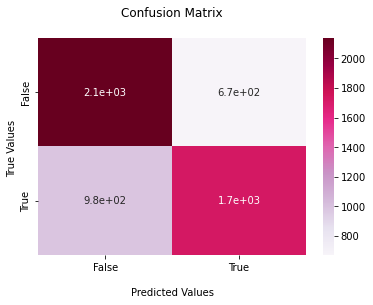

In [63]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='PuRd')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [64]:
print(cm)

[[2140  669]
 [ 981 1722]]


### 10 - ROC CURVE

In [70]:
#Import Libraries
from sklearn.metrics import roc_curve

y_pred = classifier.predict(x_test).ravel()
fprValue, tprValue, thresholdsValue = roc_curve(Y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

fpr Value  :  [0.         0.23816305 1.        ]
tpr Value  :  [0.         0.63706992 1.        ]
thresholds Value  :  [2 1 0]


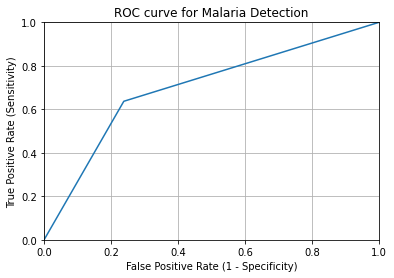

In [71]:
plt.plot(fprValue, tprValue)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Malaria Detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### CONCLUSION

- Accuracy rate exceeded 70% limit while in the training phase.
- The model have 4 hidden layers, two of them have 64 units and the other two have 32
- Batch Size = 30
- Epochs = 250
- Activation of the hidden layers = Relu
- Activation of the output layer = Sigmoid
- optimizer = Adam
- Learning Rate = 0.001
- Loss = Binary Crossentropy